David Giacobbi  
Class: CPSC 222, Spring 2022  
Data Assignment #6  
4/12/22  

# DA6: Stats and Hypothesis Testing

## Introduction

The following data used for the statistic and hypothesis testing comes from a study done on a Computer Science II (CPSC 122) course. The data tracks the number of GitHub commits made on programming projects by students in Sections 01 and 02 of the course. The series below hold these numbers for each of the students in lists `s1` and `s2`. Section 01 was the control group while Section 02 was the experimental group that used gamification as an incentive to complete assignments early.


In [20]:
import pandas as pd

s1_list = [4, 44, 21, 45, 3, 43, 19, 36, 68, 63, 24, 39, 42, 45, 25, 20, 24, 31, 2, 25, 30, 31, 24, 16, 44]
s2_list = [10, 22, 40, 58, 49, 64, 26, 57, 139, 49, 41, 66, 12, 40, 20, 67, 106, 4, 46, 4, 34, 12, 48, 11, 62]

s1 = pd.Series(s1_list)
s2 = pd.Series(s2_list)

## Statistical Computation

Now that the GitHub commit data has been uploaded into Python lists, it is now ready to be analyzed. In order to perform an extensive analysis on the comparison between the control and experimental group, the following calculations must be completed:

1. S2 Mid-Value
1. S2 Mean
1. S2 Median
1. S2 Mode
1. S2 Range
1. S2 Quartiles
1. S2 Variance
1. S2 Standard Deviation

Each calculation will include a brief summary of the meaning of the analysis as well as the formula.

### Mid-Value

The mid-value of a dataset is a central tendency measure, which is a specific representation of the values found in the middle of the data distribution. It can be defined as:

$$\frac{min + max}{2}$$

In [21]:
s2_min = s2.min()
s2_max = s2.max()

s2_mid_value = (s2_min + s2_max) / 2
print("S2 Mid-Value:", s2_mid_value)

S2 Mid-Value: 71.5


### Mean

The population mean is another central tendency measure that determines the average value of the dataset. It is important to note that outliers can heavily affect this number. It is defined as:

$$\mu = \frac{\sum X}{n}$$

$X$ = values in the data set  
$n$ = number of values in dataset

In [22]:
s2_mean = s2.mean()
print("S2 Mean:", s2_mean)

S2 Mean: 43.48


### Median

The median is another central tendency measure that finds the value of the direct middle of a sorted dataset. In cases where there is two middle values, the midpoint of these two numbers is considered the median.

In [23]:
s2_median = s2.median()
print("S2 Median:", s2_median)

S2 Median: 41.0


### Mode

The mode of the dataset is the value that appears/repeats the most compared to the other values. There can be multiple modes if there is more than one value that share the same frequency of appearance.

In [24]:
s2_mode = s2.mode()
print("S2 Mode:")
print(s2_mode)

S2 Mode:
0     4
1    12
2    40
3    49
dtype: int64


In this dataset, Python has determined that there are multiple modes in `s2`. The way to interpret the columns is:
* Column 1: each instance of a mode
* Column 2: the value of each unique mode

### Range

The range is the value in the dataset that is the difference between the maximum and minimum value. This is also a value that is heavily influenced by the outliers. It is defined as:
$$max - min$$

In [25]:
s2_range = s2.max() - s2.min()
print("Range:", s2_range)

Range: 135


### Quartiles

Quartiles are the slices of data that result from equally dividing the data set into four different pieces, using 3 data points as the dividers.

In [26]:
s2_sorted = s2.sort_values()
s2_quartiles = s2_sorted.quantile([0.25, 0.5, 0.75])
print(s2_quartiles)

0.25    20.0
0.50    41.0
0.75    58.0
dtype: float64


### Sample Variance

The variance calculation is the value of how far the dataset spreads out from the mean. The higher the variance, the dataset has a larger spread and vice versa. It is depicted as:
$$s^2 = \frac{\sum (x_i - \overline{x})}{n - 1}$$

$s^2$ = sample variance  
$x_i$ = one instance from the dataset  
$\overline{x}$ = mean of dataset  
$n$ = number of values in dataset  

In [27]:
s2_var = s2.var()
print("Variance:", round(s2_var, 2))

Variance: 1002.18


### Sample Standard Deviation

Standard deviation is simply the square root of the variance. It has the same units of the mean and is a measure of the spread of data.

$$s = \sqrt{\frac{\sum (x - \overline{x})^2}{n - 1}}$$

$s$ = sample standard deviation 
$x$ = one instance from the dataset  
$\overline{x}$ = sample mean of dataset  
$n$ = number of values in dataset  

In [28]:
s2_std = s2.std()
print("Standard Deviation:", round(s2_std, 2))

Standard Deviation: 31.66


## Confidence Intervals and T-Testing

Confidence intervals and t-tests are essential aspects of hypothesis testing in statistics. Such numbers are additional computations that can help cross-analyze experimental data with control data and general hypotheses. The following will be calculated below:

1. S1 95% Confidence Interval for Population Mean
1. S2 95% Confidence Interval for Population Mean
1. S2 One-Sample, One-Tailed T-Test of Population Mean
1. S1 and S2 Two-Sample, One-Tailed T-Test of Population Means

### S1 and S2 95% Confidence Interval for Population Mean

The confidence interval is the value range that can be % confident confirmed to lie within a certain population parameter. To calculate the confidence interval for this dataset, z-distribution will be used since it is the interval for population mean

$$CI = \overline{X} \pm t\frac{s}{\sqrt{n}}$$

$CI$ = confidence interval  
$\overline{X}$ = sample mean  
$t$ = t-distribution value  
$s$ = sample standard deviation    
$n$ = number of values in dataset  

The plus-minus part of this formula takes into account the margin of error for the interval. Using a t-distribution table and the degrees of freedom, the t-value can be found. The formula for degrees of freedom is:

$$df = n - 1$$

According to the t-table, t will equal 2.064 in this confidence interval.

#### Manual Calculations


S1 Margin of Error = $2.064 * \frac{16.63}{\sqrt{25}}$ = 6.864864  
S1 Confidence Interval: (30.72 - 6.86, 30.72 + 6.86) = (23.86, 37.58)  

S2 Margin of Error = $2.064 * \frac{31.66}{\sqrt{25}}$ = 13.069248  
S2 Confidence Interval: (43.48 - 13.07, 43.48 + 13.07) = (30.41, 56.55)  

In [29]:
import numpy as np

# S1 Confidence Interval Calcluations
s1_xbar = s1.mean()
s1_std = s1.std()
s1_n = len(s1)

margin_of_error = 2.064 * (s1_std / np.sqrt(s1_n))
print("S1 Margin of Error:", margin_of_error)

s1_conf_int = (s1_xbar - margin_of_error, s1_xbar + margin_of_error)
print("S1 Confidence Interval:", s1_conf_int)
print()

# S2 Confidence Interval Calculations
s2_xbar = s2.mean()
s2_std = s2.std()
s2_n = len(s2)

margin_of_error = 2.064 * (s2_std / np.sqrt(s2_n))
print("S2 Margin of Error:", margin_of_error)

s2_conf_int = (s2_xbar - margin_of_error, s2_xbar + margin_of_error)
print("S2 Confidence Interval:", s2_conf_int)


S1 Margin of Error: 6.865729840767114
S1 Confidence Interval: (23.854270159232886, 37.585729840767115)

S2 Margin of Error: 13.068081433722398
S2 Confidence Interval: (30.4119185662776, 56.548081433722395)


With this data, the confidence intervals can be visualized using `matplotlib.pyplot`. Using this visualization tool, the intervals can be compared to each other.

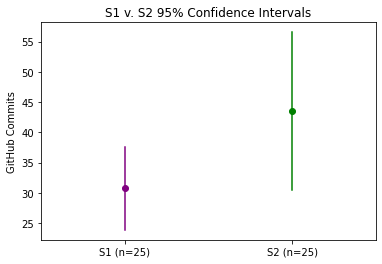

In [30]:
import matplotlib.pyplot as plt

# S1 depiction
plt.plot([1], [s1_xbar], marker='o', color="purple")
plt.plot([1,1], s1_conf_int, color="purple")

# S2 depiction
plt.plot([2], [s2_xbar], marker='o', color="green")
plt.plot([2,2], s2_conf_int, color="green")

plt.title("S1 v. S2 95% Confidence Intervals")
plt.ylabel("GitHub Commits")
plt.xticks([1, 2], ["S1 (n=25)", "S2 (n=25)"])
plt.xlim([0.5, 2.5])

plt.show()

### S2 One-Sample, One-Tailed T-Test of Population Mean

The one-sample, one-tailed t-test will be used to test the following hypothesis: Did the S2 students commit more than 28 times on average? For this test, a level of significance of 0.025 will be used. Also the population mean for this case will equal 28.


#### 1. Identify the Null and Alternative Hypotheses  
$H_o$: $\mu$ <= 28 commits  
$H_1$: $\mu$ > 28 commits  
$\mu$ = average commits by S2 students  

#### 2. Select Level of Significance
$\alpha$ = 0.025

#### 3. Select the Appropriate Test Statistic
The following t-test will be used to determine whether or not to reject the null hypothesis.

$$t = \frac{\overline{x} - \mu}{s / \sqrt{n}}$$

$\overline{X}$ = sample mean  
$\mu$ = population mean  
$s$ = sample standard deviation  
$n$ = number of values in the dataset  

##### Manual Calculations

$t = \frac{43.48 - 28}{31.66 / \sqrt{25}}$ = 2.444725

In [31]:
s2_pop_mean = 28
s2_xbar = s2.mean()
s2_s = s2.std()
s2_n = len(s2)

s2_t = (s2_xbar - s2_pop_mean) / (s2_s / np.sqrt(s2_n))
print("t:", s2_t)

t: 2.444943441931012


#### 4. Formulate the Decision Rule

Using the t-distribution table, a level of significance of 0.025, and a degree of freedom (n - 1) of 24, the t-critical value for this hypothesis test is 2.064. Using the t-critical value and knowledge of normal distributions, a decision rule can be drawn up to test the hypothesis. Since this test has only one tail, the decision rule only needs to check to the right tail of the distribution. Two decision rules result from this hypothesis test:

1. If t-computed > 2.065, reject $H_o$
1. If t-computed <= 2.065, do not reject $H_o$

This can be tested using Python logic as shown below:

In [32]:
if s2_t > 2.065:
    print("Reject Null Hypothesis")
elif s2_t <= 2.065:
    print("Do Not Reject Null Hypothesis")

Reject Null Hypothesis


#### 5. Make a Decision
Based on the decision made from the decision rule, a general conclusion can be made from the hypothesis test. At a level of 0.025 significance, students in Section 2 of CPSC122 made more than 28 commits on average. This makes sense considering the fact that the 95% Confidence Interval for Section 2 is (30.4119185662776, 56.548081433722395). 

### S1 and S2 Two-Sample, One-Tailed Test of the Population Means

The two-sample, one-tailed hypothesis test will be used to answer the following question: Did the S2 students commit more on average than the S1 students? A level of significance of 0.01 will be used.

#### 1. Identify Null and Alternative Hypotheses

$H_o$: $\mu_{S2}$ <= $\mu_{S1}$ commits  
$H_1$: $\mu_{S2}$ > $\mu_{S1}$ commits  
$\mu$ = average commits by students in each section  

#### 2. Select Level of Significance
$\alpha$ = 0.01

#### 3. Select the Appropriate Test Statistic
The following t-test will be used to determine whether or not to reject the null hypothesis.

T-Statistic Formula: 
$$t = \frac{\overline{X_1} - \overline{X_2}}{\sqrt{s^2_p(\frac{1}{n_1} + \frac{1}{n_2})}}$$

Pooled Variance:
$$s^2_p = \frac{(n_1 - 1)s_1^2 + (n_2 - 1)s_2^2}{n_1 + n_2 - 2}$$

##### Manual Calculations

$s^2_p = \frac{(25 - 1)25^2 + (25 - 1)25^2}{25 + 25 - 2}$ = $\frac{30000}{48}$ = 625

$t = \frac{43.48 - 30.72}{\sqrt{625(\frac{1}{25} + \frac{1}{25})}}$ = 1.8045365


In [34]:
from scipy import stats

t, pval = stats.ttest_ind(s2, s1, equal_var=False)
pval /= 2
print("t:", t, "pval:", pval)

t: 1.784098380137661 pval: 0.041383224909752096


#### 4. Formulate the Decision Rule

Using the t-distribution table with the level of significance (0.01) and the degrees of freedom (24), the t-critical value for this hypothesis test is 2.492. The decision rule can be checked using the computed t-value or p-value. The following conditions can be drawn up using the initial hypotheses:

1. If t-computed > 2.492, reject $H_o$.
1. If t-computed <= 2.492, do not reject $H_o$.
1. If p-value < 0.01, reject $H_o$.
1. If p-value >= 0.01, do not reject $H_o$.

Python logic can demonstrate the above tests:

In [36]:
if t > 2.492:
    print("Reject the Null Hypothesis")
elif t <= 2.492:
    print("Do Not Reject the Null Hypothesis")

alpha = 0.01
if pval < alpha:
    print("Reject the Null Hypothesis")
else:
    print("Do Not Reject the Null Hypothesis")

Do Not Reject the Null Hypothesis
Do Not Reject the Null Hypothesis


#### 5. Make a Decision

From the decision rule, the null hypothesis that was formulated does not have sufficient evidence to be rejected at a level of significance of 0.01. This means that given this level of significance, Section 2 did not make more commits on average than Section 1 did in CPSC 122.